In [ ]:
!pip  install transformers==4.22.1 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 97.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.22.1 which is incompatible.


In [101]:
from transformers import DistilBertTokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
root_path = '/content/merged.csv'

In [103]:
df = pd.read_csv(root_path)
df.head()

,claim,main_text,explanation,label,text
0,A mother revealed to her child in a letter aft...,"In April 2005, we spotted a tearjerker on the ...",The one-eyed mother story expounds upon two mo...,false,A mother revealed to her child in a letter aft...
1,Study says too many Americans still drink too ...,That means the great majority of Americans sta...,"On any given day in the United States, 18 perc...",true,Study says too many Americans still drink too ...
2,Viral image Says 80% of novel coronavirus case...,"Amid the spread of the novel coronavirus, many...",The website Information is Beautiful published...,true,Viral image Says 80% of novel coronavirus case...
3,An email says that 9-year old Craig Shergold o...,Craig Shergold is real and in 1989...,Send greeting or business cards to cancer vict...,false,An email says that 9-year old Craig Shergold o...
4,"Employees at a Five Guys restaurant in Daphne,...","In July 2020, amid a new wave of nationwide pr...","What's undetermined: As of this writing, Five ...",unproven,"Employees at a Five Guys restaurant in Daphne,..."


In [104]:
df.shape

(1235, 5)

In [105]:
df['count'] = df['main_text'].apply(lambda x: len(x.split()))

In [106]:
df.head()

,claim,main_text,explanation,label,text,count
0,A mother revealed to her child in a letter aft...,"In April 2005, we spotted a tearjerker on the ...",The one-eyed mother story expounds upon two mo...,false,A mother revealed to her child in a letter aft...,1840
1,Study says too many Americans still drink too ...,That means the great majority of Americans sta...,"On any given day in the United States, 18 perc...",true,Study says too many Americans still drink too ...,465
2,Viral image Says 80% of novel coronavirus case...,"Amid the spread of the novel coronavirus, many...",The website Information is Beautiful published...,true,Viral image Says 80% of novel coronavirus case...,456
3,An email says that 9-year old Craig Shergold o...,Craig Shergold is real and in 1989...,Send greeting or business cards to cancer vict...,false,An email says that 9-year old Craig Shergold o...,411
4,"Employees at a Five Guys restaurant in Daphne,...","In July 2020, amid a new wave of nationwide pr...","What's undetermined: As of this writing, Five ...",unproven,"Employees at a Five Guys restaurant in Daphne,...",627


<Figure size 800x800 with 0 Axes>

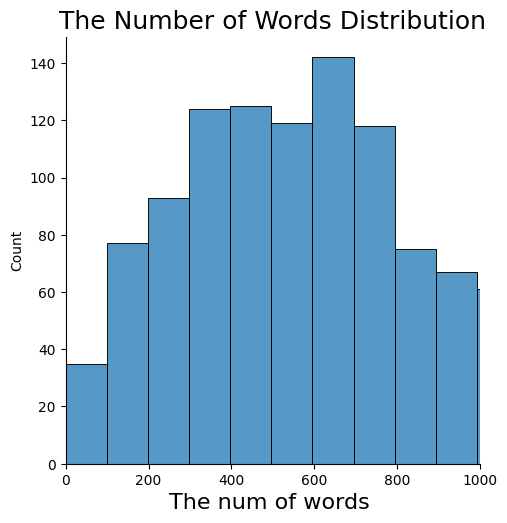

In [107]:
plt.figure(figsize= (8, 8))

sns.displot(df['count'])

plt.xlim(0, 1000)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

In [108]:
label_count = df['label'].value_counts()

labels = label_count.index

labels

Index(['true', 'false', 'mixture', 'unproven'], dtype='object', name='label')

In [109]:
label_count

,count
label,
true,599
false,388
mixture,201
unproven,45


In [110]:
label_count.index

Index(['true', 'false', 'mixture', 'unproven'], dtype='object', name='label')

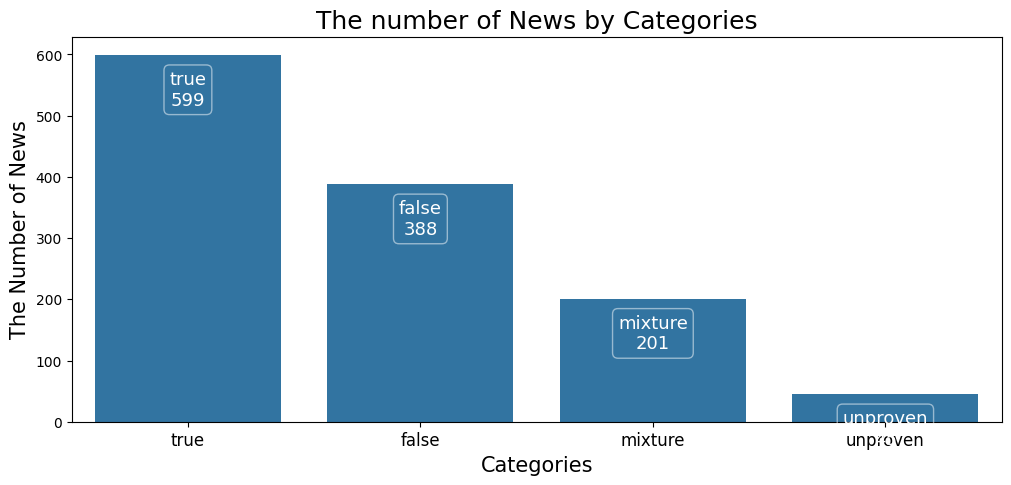

In [111]:
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = label_count.index, y = label_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{labels[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of News', size= 15)

plt.xticks(size = 12)

plt.title("The number of News by Categories" , size = 18)

plt.show()

In [112]:
df['label'].unique()

array(['false', 'true', 'unproven', 'mixture', nan], dtype=object)

In [113]:
df['encoded_label'] = df['label'].astype('category').cat.codes

df.head(10)

,claim,main_text,explanation,label,text,count,encoded_label
0,A mother revealed to her child in a letter aft...,"In April 2005, we spotted a tearjerker on the ...",The one-eyed mother story expounds upon two mo...,false,A mother revealed to her child in a letter aft...,1840,0
1,Study says too many Americans still drink too ...,That means the great majority of Americans sta...,"On any given day in the United States, 18 perc...",true,Study says too many Americans still drink too ...,465,2
2,Viral image Says 80% of novel coronavirus case...,"Amid the spread of the novel coronavirus, many...",The website Information is Beautiful published...,true,Viral image Says 80% of novel coronavirus case...,456,2
3,An email says that 9-year old Craig Shergold o...,Craig Shergold is real and in 1989...,Send greeting or business cards to cancer vict...,false,An email says that 9-year old Craig Shergold o...,411,0
4,"Employees at a Five Guys restaurant in Daphne,...","In July 2020, amid a new wave of nationwide pr...","What's undetermined: As of this writing, Five ...",unproven,"Employees at a Five Guys restaurant in Daphne,...",627,3
5,FBI agent Peter Strzok II grew up in Iran; had...,"Longtime FBI agent Peter Strzok II, who until ...",Peter Strzok spent several years of his childh...,unproven,FBI agent Peter Strzok II grew up in Iran; had...,2098,3
6,Roche's schizophrenia drug misses goal in two ...,Results of two Phase III trials found bitopert...,An experimental Roche drug designed to treat t...,true,Roche's schizophrenia drug misses goal in two ...,326,2
7,Doctors end protest to demand flu vaccines for...,Dr. Bonnie Arzuaga said Customs and Border Pat...,A group of doctors on Wednesday ended a three-...,true,Doctors end protest to demand flu vaccines for...,600,2
8,The Westmoreland News ran a KKK ad on the fron...,"On 25 April 2018, the front page story of Virg...",What's true: The Westmoreland News did publish...,mixture,The Westmoreland News ran a KKK ad on the fron...,583,1
9,The new supplement InteliGEN can boost brain f...,"Fueled by searing temperatures and high winds,...",Tens of thousands of holiday makers fled seasi...,unproven,The new supplement InteliGEN can boost brain f...,702,3


In [114]:
data_texts = df['main_text'].to_list()

data_labels = df['encoded_label'].to_list()

In [115]:
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 0 )


train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size = 0.01, random_state = 0 )

In [116]:
tokenizer = AutoTokenizer.from_pretrained('austinmw/distilbert-base-uncased-finetuned-health_facts')

train_encodings = tokenizer(train_texts, truncation = True, padding = True  )

val_encodings = tokenizer(val_texts, truncation = True, padding = True )

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



In [117]:
print(train_encodings.keys())

dict_keys(['input_ids', 'attention_mask'])


In [118]:
from torch.utils.data import Dataset
import torch
class DataLoader(Dataset):
    """
    Custom Dataset class for handling tokenized text data and corresponding labels.
    Inherits from torch.utils.data.Dataset.
    """
    def __init__(self, encodings, labels):
        """
        Initializes the DataLoader class with encodings and labels.

        Args:
            encodings (dict): A dictionary containing tokenized input text data
                              (e.g., 'input_ids', 'token_type_ids', 'attention_mask').
            labels (list): A list of integer labels for the input text data.
        """
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        """
        Returns a dictionary containing tokenized data and the corresponding label for a given index.

        Args:
            idx (int): The index of the data item to retrieve.

        Returns:
            item (dict): A dictionary containing the tokenized data and the corresponding label.
        """
        # Retrieve tokenized data for the given index
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Add the label for the given index to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        """
        Returns the number of data items in the dataset.

        Returns:
            (int): The number of data items in the dataset.
        """
        return len(self.labels)

In [119]:
train_dataloader = DataLoader(train_encodings, train_labels)

val_dataloader = DataLoader(val_encodings, val_labels)



In [133]:
print(train_dataloader[0])
print(val_dataloader[0])

{'input_ids': tensor([  101,  2005,  5109,  1010,  6529,  2031,  6884,  1037,  4434,  2090,
        13061,  1998, 21901,  1521,  1055,  4295,  1010,  1998,  3251,  2107,
         1037,  4957,  6526,  2038,  2042,  1996,  3395,  1997,  1037,  2146,
         1011,  3061,  5981,  2306,  1996,  4045,  2451,  1012,  1006,  5262,
         1010,  2043,  4333,  2143,  2307, 18466, 24632,  2080,  2979,  2185,
         2013,  1037,  2566, 29278,  4383, 17359, 17119,  1999,  4881,  1010,
        19075,  2218,  2008,  2010, 13614,  2001,  3303,  2011,  2010, 15077,
         2833,  4810,  1999, 13061,  5660,  8059,  1012,  1007,  1996,  2062,
         3563,  4366,  2055,  1996,  2740, 16796,  8434,  2007, 13061, 17910,
         2411, 16949,  2039,  1999, 13434,  2739,  3441,  1010,  2107,  2004,
         2028,  2405,  2006, 11562, 26068,  2102,  2609, 22091,  2213,  1012,
         4012,  2104,  1996, 17653,  1523,  7435,  2085,  2031,  5432,  1024,
         2065,  2017,  2224, 13061, 17910,  1010, 

In [121]:
model = AutoModelForSequenceClassification.from_pretrained("austinmw/distilbert-base-uncased-finetuned-health_facts")

In [132]:
from transformers import TFDistilBertForSequenceClassification, Trainer, TrainingArguments

import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
import torch
print(torch.cuda.is_available())

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=50,
    weight_decay=1e-5,
    logging_dir='./logs',
    eval_steps=10
)

# with training_args.strategy.scope():
#     trainer_model = AutoModelForSequenceClassification.from_pretrained('austinmw/distilbert-base-uncased-finetuned-health_facts', num_labels = 5 )


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataloader,
    eval_dataset=val_dataloader,
)


True


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
